In [2]:
import pandas as pd

In [4]:
ratings_df = pd.read_csv(f'../datasets/netflix/ratings.csv.gz')
ratings_df

,user_id,item_id,rating,date
0,6,30,3,2004-09-15
1,6,157,3,2004-09-15
2,6,173,4,2004-09-15
3,6,175,5,2004-10-10
4,6,191,2,2004-11-24
...,...,...,...,...
100480502,2649429,17560,5,2002-05-16
100480503,2649429,17580,4,2004-11-28
100480504,2649429,17622,4,2003-02-28
100480505,2649429,17627,3,2003-07-21


In [5]:
movies_df = pd.read_csv(f'../datasets/netflix/movies.csv.gz')
movies_df

,item_id,release_year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [9]:
num_of_users = ratings_df['user_id'].nunique()
num_of_movies = ratings_df['item_id'].nunique()
num_of_ratings = ratings_df.shape[0]
ratings = ratings_df['rating'].unique()
ratings.sort()
print(f'# users: {num_of_users}')
print(f'# movies: {num_of_movies}')
print(f'# ratings: {num_of_ratings}')
print(ratings)

# users: 480189
# movies: 17770
# ratings: 100480507
[1 2 3 4 5]


In [10]:
users_ratings = ratings_df.groupby('user_id').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean'),
    # rating_std=('rating', 'std'),
    rating_var=('rating', 'var')
)
users_ratings.reset_index(inplace=True)
users_ratings.head()


,user_id,rating_count,rating_mean,rating_var
0,6,626,3.418530,0.698152
1,7,881,4.011351,0.808962
2,8,98,4.214286,0.623711
3,10,260,3.392308,1.096466
4,25,27,3.481481,1.490028


<AxesSubplot:>

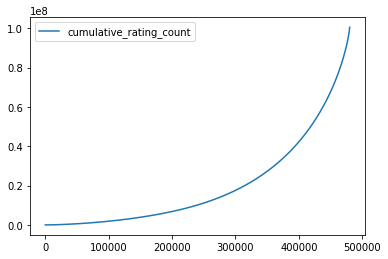

In [11]:
sorted = users_ratings.sort_values(by='rating_count')
sorted['cumulative_rating_count'] = sorted['rating_count'].cumsum()
sorted.reset_index(inplace=True)
sorted
sorted.plot.line(y='cumulative_rating_count')

In [12]:
# group_by_num_ratings['total_ratings'] = group_by_num_ratings['count'] * group_by_num_ratings['mean']
# variances and means are uncorelated, and the users that we aggregate have the same amount of ratings
# therefore we can aggregate their mean and variance
group_by_num_ratings = users_ratings.groupby('rating_count').agg(
    group_size=('rating_count', 'size'),
    group_rating_mean=('rating_mean', 'mean'),
    group_rating_var=('rating_var', 'mean')
)
group_by_num_ratings.reset_index(inplace=True)
group_by_num_ratings['total_ratings'] = group_by_num_ratings['group_size'] * group_by_num_ratings['rating_count']
group_by_num_ratings
# group_by_num_ratings.head()
# user_ratings_groups = pd.cut(users_ratings['count'], bins=10)
# user_ratings_groups.head()

,rating_count,group_size,group_rating_mean,group_rating_var,total_ratings
0,1,1269,3.688731,NaN,1269
1,2,2226,3.667341,1.255391,4452
2,3,1973,3.651968,1.239567,5919
3,4,1734,3.657872,1.172770,6936
4,5,1707,3.650264,1.151904,8535
...,...,...,...,...,...
2777,14831,1,4.082328,0.595852,14831
2778,15813,1,4.264339,0.734826,15813
2779,16565,1,1.216843,0.570219,16565
2780,17436,1,1.809073,0.820729,17436


<AxesSubplot:xlabel='rating_count'>

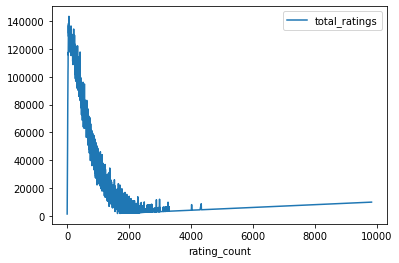

In [13]:
# group_by_num_ratings.describe()
limit_to_max_1000_ratings = group_by_num_ratings.where(group_by_num_ratings['rating_count'] < 10000)
limit_to_max_1000_ratings['cumulative_total_ratings'] = limit_to_max_1000_ratings['total_ratings'].cumsum()
limit_to_max_1000_ratings['cumulative_group_size'] = limit_to_max_1000_ratings['group_size'].cumsum()
# limit_to_max_1000_ratings['cumulative_total_ratings_sqrt'] = limit_to_max_1000_ratings['cumulative_total_ratings']
# group_by_num_ratings['cumulative_total_ratings']
limit_to_max_1000_ratings.plot.line(x='rating_count', y =['total_ratings'])